## ORIE 6750 Homework 3 Question 1

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# define parameters: horizon, cost, discretization buckets

H=50
c=0.05
M=100
delta = 1/M

# initialize array for storing value function; state space is (M+1)^2 dimensional
V = np.zeros([H+1, M+1, M+1])

# initialize array for storing Q-factor for going at each time period
Q_go = np.zeros([H+1, M+1, M+1])

# initialize array for storing optimal actions, 
# -1=keep going, 0,1,2 = stop and predict x
actions = (-1)*np.ones([H+1, M+1, M+1]) 


In [81]:
# define function to output the largest among p0, p1, p2, where p0=1-p1-p2

def predict(p1, p2):
    p0 = 1-p1-p2
    if p0>=p1 and p0>=p2:
        return 0
    elif p1>=p0 and p1>=p2:
        return 1
    elif p2>=p0 and p2>=p1:
        return 2

In [79]:
predict(0.1,0.2)

0

In [82]:
for i in range(M+1):
    for j in range(M+1-i):
        V[0,i,j] = np.amin([(i+j)*delta, 1-i*delta, 1-j*delta])
        actions[0,i,j] = predict(i*delta, j*delta)
        
for h in range(1,H+1):
    for i in range(M+1):
        p1 = i*delta
        for j in range(M+1-i):
            p2 = j*delta
            ind01 = np.floor( 4*p1 / (p1-p2+3))
            ind02 = np.floor( 2*p2 / (p1-p2+3))
            ind11 = np.floor( 2*p1 / (-p1+p2+3))
            ind12 = np.floor( 4*p2 / (-p1+p2+3))
            Q_go[h,i,j] = c + (1/2+p1/6-p2/6)*V[h-1,int(ind01),int(ind02)] \
                        + (1/2-p1/6+p2/6)*V[h-1,int(ind11),int(ind12)]
            V[h,i,j] = np.amin([V[0,i,j], Q_go[h,i,j]])
            if V[0,i,j] < Q_go[h,i,j]:
                actions[h,i,j] = predict(i*delta, j*delta)
    
    #V[h,:,:] = np.minimum(V[0,:,:], Q_go[h,:,:])

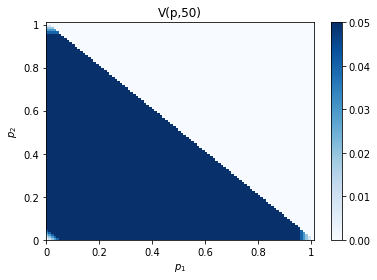

In [103]:
# plot the value function at the start for different p1, p2 values

fig, ax = plt.subplots()
value0=ax.pcolor(V[50,:,:], cmap=plt.cm.Blues)
fig.colorbar(value0, ax=ax)

positions = (0, 20, 40, 60, 80, 100)
labels = ("0", "0.2", "0.4", '0.6', '0.8', '1')
plt.xticks(positions, labels)
plt.yticks(positions, labels)

plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.title('V(p,50)')
plt.show()


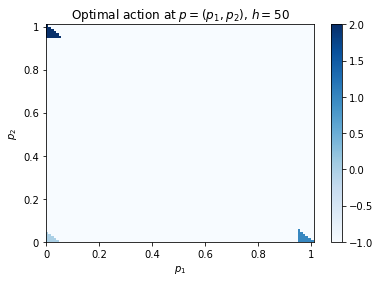

In [105]:
# plot the optimal action at the start for different p1, p2 values

fig, ax = plt.subplots()
action=ax.pcolor(np.transpose(actions[50,:,:]), cmap=plt.cm.Blues)
fig.colorbar(action, ax=ax)

positions = (0, 20, 40, 60, 80, 100)
labels = ("0", "0.2", "0.4", '0.6', '0.8', '1')
plt.xticks(positions, labels)
plt.yticks(positions, labels)

plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.title('Optimal action at $p=(p_1,p_2)$, $h=50$')

plt.show()